# Importy

In [1]:
import locale

import csv
import numpy as np
from PIL import Image, ImageDraw

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random as random
from IPython.display import Image as JupyterImage, display, clear_output

# Nastaveni

In [2]:
def sigmoida(phi):
    return np.round(1.0 / (1.0 + np.exp(-phi)), 15)

speed = 0.05 #rychlost učení
inertia = 0.3 #setrvačnost

# Percepton

In [3]:
class Percepton:
    def __init__(self, num_outputs, num_inputs, activation):
        self.num_inputs = num_inputs
        self.num_outputs = num_outputs
        self.w = np.zeros((num_outputs, num_inputs))
        self.th = np.zeros(num_outputs)
        self.activation_function = activation
        self.delta = np.zeros(num_outputs)
        self.dws = np.zeros((num_outputs, num_inputs))
        self.odw = np.zeros((num_outputs, num_inputs))
        self.dths = np.zeros(num_outputs)
        self.odth = np.zeros(num_outputs)
        self.outputs = np.zeros(num_outputs) #Y - outputs from Perceptron

    def outputDelta(self, d):
        # deltai = (di - yi) * (yi * (1 - yi))
        diff = d - self.outputs
        self.delta = diff * (self.outputs * (1 - self.outputs))
        return diff @ diff / len(self.outputs)

    def learn(self, xInputs):
        # self.dws += self.delta * xInputs
        for i in range(len(self.dws)):
            self.dws[i] += self.delta[i] * xInputs

        self.dths += -self.delta

    def backPropagate(self, prevLayer):
        # print('out', np.transpose(self.w) @ self.delta)
        prevLayer.delta = (np.transpose(self.w) @ self.delta) * (prevLayer.outputs * (1 - prevLayer.outputs))

    def epochStart(self):
        self.dws = np.zeros((self.num_outputs, self.num_inputs))
        self.dths = np.zeros(self.num_outputs)
        self.outputs = np.zeros(self.num_outputs)

    def epochFinish(self):
        dws_temp = speed * self.dws + inertia * self.odw
        self.w += dws_temp
        self.odw = dws_temp

        dths_temp = speed * self.dths + inertia * self.odth
        self.th += dths_temp
        self.odth = dths_temp

    def recall(self, inputs_array):
        self.outputs = self.activation_function(self.w @ inputs_array - self.th)
        return self.outputs

    def init(self, randon_range_min, randon_range_max):
        for x in range(len(self.w)):
            for y in range(len(self.w[x])):
                self.w[x][y] = random.uniform(randon_range_max, randon_range_min)

        for x in range(len(self.th)):
            self.th[x] = random.uniform(randon_range_max, randon_range_min)

# Net

In [4]:
class Net:
    def __init__(self):
        self.layers = []
        self.output = []

    def recall(self, x):
        self.layers[0].recall(x)
        return self.layers[1].recall(self.layers[0].outputs)

    def netInit(self, randon_range_min, randon_range_max):
        self.layers = []
        self.layers.append(Percepton(4, 4, sigmoida))
        self.layers.append(Percepton(3, 4, sigmoida))
        self.output = self.layers[1]
        for l in self.layers:
            l.init(randon_range_min, randon_range_max)

    def epochStart(self):
        for l in self.layers:
            l.epochStart()

    def epochFinish(self):
        for l in self.layers:
            l.epochFinish()

    def learn(self, x, d):
        self.recall(x)
        e = self.layers[1].outputDelta(d)
        # print('mse', e)
        self.layers[1].learn(self.layers[0].outputs)
        self.layers[1].backPropagate(self.layers[0])
        self.layers[0].learn(x)
        return e

    def print_net(self):
        print("%1.15f" % self.layers[1].outputs[0] + ";output:y")
        print("%1.15f" % self.layers[1].th[0] + ";output:threshold")
        print("%1.15f" % self.layers[1].w[0][0] + ";output:w[0]")
        print("%1.15f" % self.layers[1].w[0][1] + ";output:w[1]")
        print("%1.15f" % self.layers[1].delta[0] + ";output:delta")
        print("%1.15f" % self.layers[1].dths[0] + ";output:deltathreshold")
        print("%1.15f" % self.layers[1].dws[0][0] + ";output:deltaw[0]")
        print("%1.15f" % self.layers[1].dws[0][1] + ";output:deltaw[1]")
        print("%1.15f" % self.layers[0].outputs[0] + ";hidden:y[0]")
        print("%1.15f" % self.layers[0].outputs[1] + ";hidden:y[1]")
        print("%1.15f" % self.layers[0].th[0] + ";hidden:threshold[0]")
        print("%1.15f" % self.layers[0].th[1] + ";hidden:threshold[1]")
        print("%1.15f" % self.layers[0].w[0][0] + ";hidden:w[0][0]")
        print("%1.15f" % self.layers[0].w[0][1] + ";hidden:w[0][1]")
        print("%1.15f" % self.layers[0].w[1][0] + ";hidden:w[1][0]")
        print("%1.15f" % self.layers[0].w[1][1] + ";hidden:w[1][1]")
        print("%1.15f" % self.layers[0].delta[0] + ";hidden:delta[0]")
        print("%1.15f" % self.layers[0].delta[1] + ";hidden:delta[1]")
        print("%1.15f" % self.layers[0].dths[0] + ";hidden:deltathreshold[0]")
        print("%1.15f" % self.layers[0].dths[1] + ";hidden:deltathreshold[1]")
        print("%1.15f" % self.layers[0].dws[0][0] + ";hidden:deltaw[0][0]")
        print("%1.15f" % self.layers[0].dws[0][1] + ";hidden:deltaw[0][1]")
        print("%1.15f" % self.layers[0].dws[1][0] + ";hidden:deltaw[1][0]")
        print("%1.15f" % self.layers[0].dws[1][1] + ";hidden:deltaw[1][1]")
        # print("%1.15f" % self.layers[0].oth[0] + ";hidden:old delta threshold [0]")
        # print("%1.15f" % self.layers[0].oth[1] + ";hidden:old delta threshold [1]")
        print("%1.15f" % self.layers[0].odw[0][0] + ";hidden:olddeltaw[0][0]")
        print("%1.15f" % self.layers[0].odw[0][1] + ";hidden:olddeltaw[0][1]")
        print("%1.15f" % self.layers[0].odw[1][0] + ";hidden:olddeltaw[1][0]")
        print("%1.15f" % self.layers[0].odw[1][1] + ";hidden:olddeltaw[1][1]")

# Init

In [5]:
def normalize(value, min, max):
    return (value - min) / (max - min)



net = Net()
net.netInit(-0.3, 0.3)

# Dataset

In [6]:
filename = 'iris.data'
raw_data = open(filename, 'rt')
reader = csv.reader(raw_data, delimiter=',', quoting=csv.QUOTE_NONE)
x = list(reader)

trainSet = []

for item in x:
    if len(item) > 0:
        trainSet.append(
                  [
                      np.array([
                          normalize(float(item[0]), 4.3, 7.9),
                          normalize(float(item[1]), 2, 4.4),
                          normalize(float(item[2]), 1, 6.9),
                          normalize(float(item[3]), 0.1, 2.5)
                      ]),
                      np.array([
                          1 if item[4] == "Iris-virginica" else 0,
                          1 if item[4] == "Iris-versicolor" else 0,
                          1 if item[4] == "Iris-setosa" else 0
                      ])
                  ])


# Learn

EPOCH: 1401
Error: 0.00904929073164284


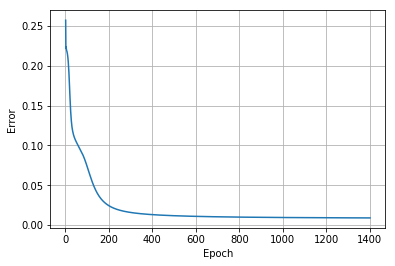

EPOCH: 1464
Error: 0.008999626514145475


In [7]:
rms = []
epoch = []
avgErr = 0
err = 0
for i in range(10000):
    avgErr = 0
    net.epochStart()
    for pat in trainSet:
        avgErr += net.learn(pat[0], pat[1])
    net.epochFinish()
    err = avgErr/len(trainSet)

    if err < 0.009:
        print("EPOCH:", i + 1)
        print("Error:", err)
        print("========================")
        break

    rms.append( err )
    epoch.append(i + 1)

    if i % 200 == 0:
        clear_output()
        print("EPOCH:", i + 1)
        print("Error:", err)
        fig, axs = plt.subplots(1, 1)
        axs.plot(epoch, rms)
        axs.set_xlabel('Epoch')
        axs.set_ylabel('Error')
        axs.grid(True)
        plt.show()


# RMS graf

In [8]:
# fig, axs = plt.subplots(1, 1)
# axs.plot(epoch, rms)
# axs.set_xlabel('Epoch')
# axs.set_ylabel('Error')
# axs.grid(True)
# plt.show()

# Ověření

In [9]:
print("After learn "+str(trainSet[0][1])+" :", np.round(net.recall(trainSet[0][0])))
print("After learn "+str(trainSet[55][1])+" :", np.round(net.recall(trainSet[55][0])))
print("After learn "+str(trainSet[107][1])+" :", np.round(net.recall(trainSet[107][0])))
print("After learn "+str(trainSet[142][1])+" :", np.round(net.recall(trainSet[142][0])))

After learn [0 0 1] : [0. 0. 1.]
After learn [0 1 0] : [0. 1. 0.]
After learn [1 0 0] : [1. 0. 0.]
After learn [1 0 0] : [1. 0. 0.]
